In [21]:
# Import Dependencies
import math
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
from numpy import log as ln

In [22]:
# Import our data into pandas from CSV
s_p_500 = 'data/SP500.csv'
tbill_int_rate = 'data/TB3MS.csv'

s_p_500_df = pd.read_csv(s_p_500, low_memory=False)
tbill_int_rate_df = pd.read_csv(tbill_int_rate, low_memory=False)

complete_df = pd.merge(s_p_500_df, tbill_int_rate_df, how="inner")


In [23]:
tbill_int_rate_df["month"] = pd.to_datetime(tbill_int_rate_df["DATE"])
tbill_int_rate_df["month"] = tbill_int_rate_df["month"].dt.to_period("M")
tbill_int_rate_df["month"] = tbill_int_rate_df["month"].dt.strftime('%m/%Y')


<function matplotlib.pyplot.show(close=None, block=None)>

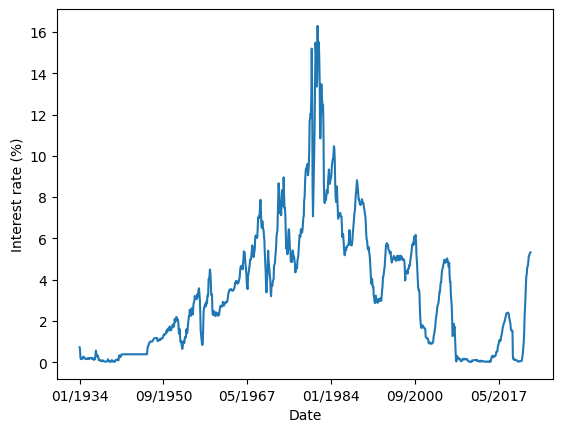

In [24]:
x = tbill_int_rate_df["month"]
y = tbill_int_rate_df["TB3MS"]

plt.xticks(np.arange(0, len(x)+1, 200))
plt.xlabel("Date")
plt.ylabel("Interest rate (%)")
plt.plot(x,y)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

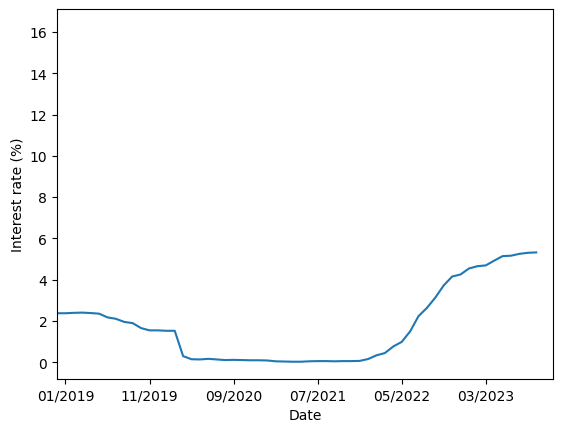

In [25]:
x = tbill_int_rate_df["month"]
y = tbill_int_rate_df["TB3MS"]


plt.xticks(np.arange(0, len(x)+1, 10))
plt.xlim(1019,1078)
plt.xlabel("Date")
plt.ylabel("Interest rate (%)")
plt.plot(x,y)
plt.show

In [26]:
s_p_500_df["month"] = pd.to_datetime(s_p_500_df["DATE"])

In [27]:
# Drop rows with NaN (empty) values in the 'SP500' column
s_p_500_df["SP500"] = pd.to_numeric(s_p_500_df["SP500"], errors="coerce")
s_p_500_df["number"] = s_p_500_df["SP500"].astype(float)
s_p_500_df = s_p_500_df[~s_p_500_df['SP500'].isna()]


In [28]:
# Set the "Date" column as the DataFrame's index
s_p_500_df.set_index('month', inplace=True)

# Resample the data to monthly frequency and calculate the mean for each month
monthly_avg = s_p_500_df['number'].resample('M').mean()

# Reset the index to make "Date" a column again (optional)
#monthly_avg.reset_index(inplace=True)
monthly_avg = pd.DataFrame({'month': monthly_avg.index, 'average_number': monthly_avg.values})


<function matplotlib.pyplot.show(close=None, block=None)>

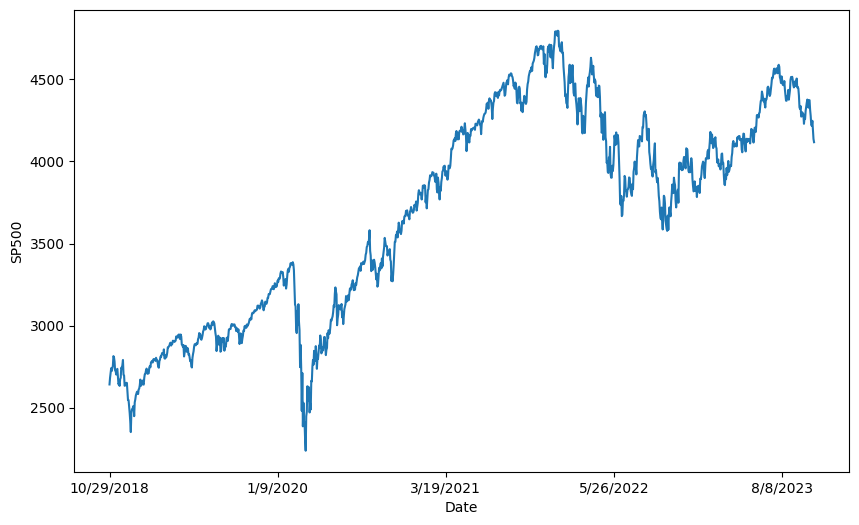

In [29]:
x = s_p_500_df["DATE"]
y = s_p_500_df["SP500"]

plt.figure(figsize=(10, 6))
plt.xticks(np.arange(0, len(x)+1, 300))
plt.xlabel("Date")
plt.ylabel("SP500")
plt.plot(x,y)
plt.show